# TASK - 8 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# 1. Load Dataset
df = pd.read_csv('Mall_Customers.csv')
print(df.head())
print(df.info())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Missing values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


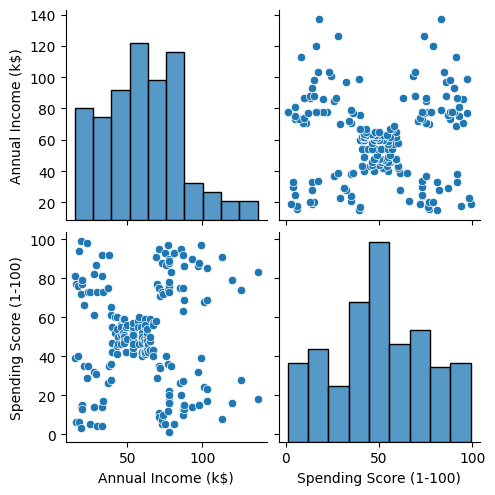

In [2]:
# 2. Data Cleaning & Exploration
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Summary stats
print(df.describe())

# Optional: Visualize distributions of features
sns.pairplot(df[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


In [3]:
# 3. Feature Selection and Scaling
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
#4. Dimensionality Reduction (optional if more features are selected)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

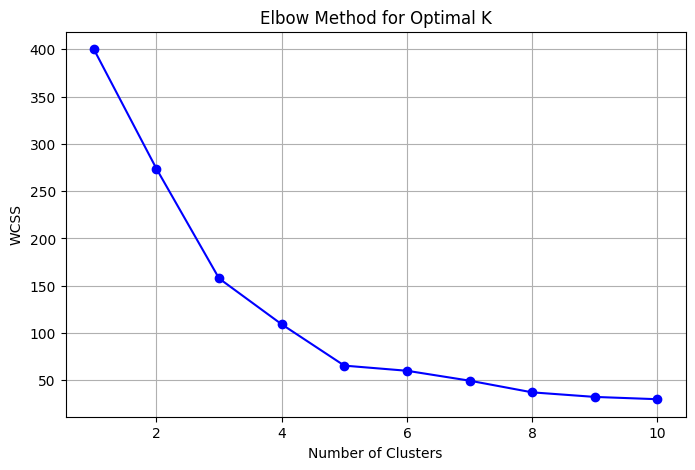

In [5]:
# 5. Determine optimal K with Elbow Method
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

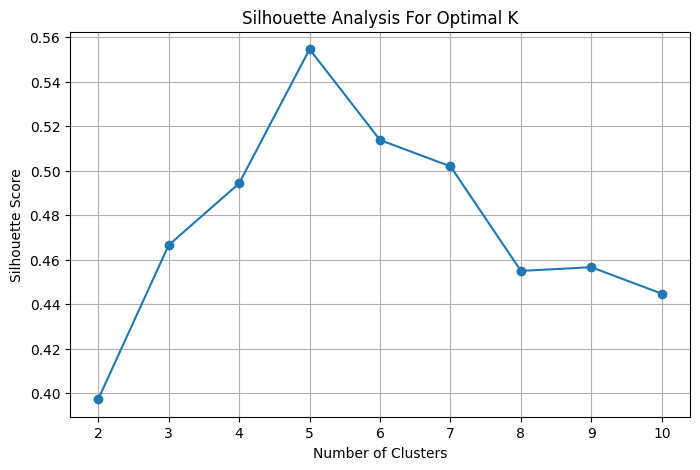

In [6]:
# 6. Additional Method: Silhouette Analysis for different Ks
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    sil_score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(sil_score)

plt.figure(figsize=(8, 5))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal K')
plt.grid(True)
plt.show()

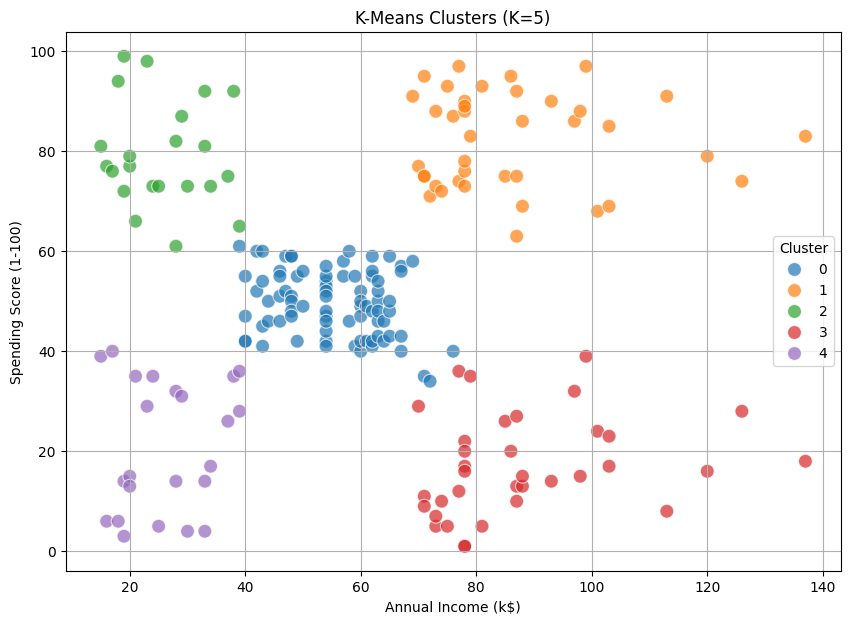

In [7]:
# 7. Train final model with selected K (choose based on above plots, e.g. 5)
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)
df['Cluster'] = cluster_labels

# 8. Visualize Clusters
plt.figure(figsize=(10, 7))
palette = sns.color_palette('tab10', optimal_k)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette=palette, s=100, alpha=0.7)
plt.title(f'K-Means Clusters (K={optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [8]:
# 9. Cluster Centers (in scaled space)
centers_scaled = kmeans.cluster_centers_
print("Cluster centers (scaled features):\n", centers_scaled)

# To interpret cluster centers in original feature scale:
centers_original = scaler.inverse_transform(centers_scaled)
print("Cluster centers (original features):\n", centers_original)

Cluster centers (scaled features):
 [[-0.20091257 -0.02645617]
 [ 0.99158305  1.23950275]
 [-1.32954532  1.13217788]
 [ 1.05500302 -1.28443907]
 [-1.30751869 -1.13696536]]
Cluster centers (original features):
 [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


In [9]:
# 10. Cluster Profiling - analyze characteristics of each cluster
cluster_summary = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
          Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [10]:
# 11. Additional Evaluation Metrics
ch_score = calinski_harabasz_score(X_scaled, cluster_labels)
db_score = davies_bouldin_score(X_scaled, cluster_labels)

print(f'Calinski-Harabasz Index: {ch_score:.3f} (Higher is better)')
print(f'Davies-Bouldin Index: {db_score:.3f} (Lower is better)')

Calinski-Harabasz Index: 248.649 (Higher is better)
Davies-Bouldin Index: 0.572 (Lower is better)


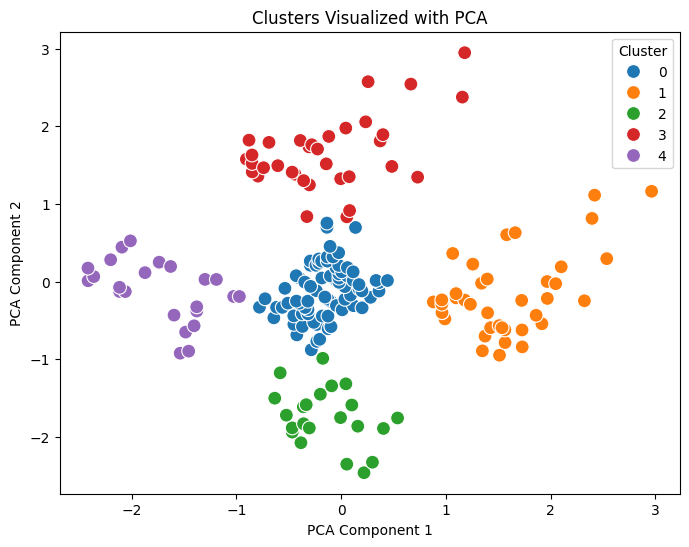

In [11]:
# 12. Optional: Visualize clusters using PCA (if you have more features)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette=palette, s=100)
plt.title('Clusters Visualized with PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
